### Preliminary Analysis
The Preliminary analysis should follow the following format as this is the format of your final paper.
1. Abstract
2. Intro/background of the problem
3. Methods
4. Results
5. Discussion/conclusion
6. Acknowledgments
7. References

You should be able to complete some of the intro/background of the problem, methods, preliminary results, and discussion. I understand that some of this information can change over the next few weeks, but it is better to start your Master Doc now instead of waiting until the end of the semester.

This should be submitted through the group assignment submission regardless if it is an independent project or multi-person group.

If you are working independently, post this assignment in your Teams project milestones folder – you will use this folder the remainder of the course for other independent team members to be able to review your work.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

### Load Data

In [2]:
data = pd.read_csv('data/diabetic_data.csv', na_values = '?', low_memory=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Initial Data Exploration

Checking Basic Shape of the data

In [3]:
data.shape  # number of columns and rows

(101766, 50)

Head

In [4]:
data.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
# Checking summary of numerical columns
data.describe()

# Out of 50 - 13 columns are numerical

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
# Checking summary of numerical columns
data.describe(include = ['O']).T.drop('count', axis=1)
# Out of 50 - 37 columns are categorical

,unique,top,freq
race,5,Caucasian,76099
gender,3,Female,54708
age,10,[70-80),26068
weight,9,[75-100),1336
payer_code,17,MC,32439
medical_specialty,72,InternalMedicine,14635
diag_1,716,428,6862
diag_2,748,276,6752
diag_3,789,250,11555
max_glu_serum,4,None,96420


# Data Preparation
Each step has been taken based on study of the attributes. Have tried explaining what I am thinking and trying to do here.

### Remove Discharge IDs relating to Hospice or Death
As these are people who are either terminally ill or dead. So this would not bring out the real picture as per my understanding. Check details of disposition ids in IDs_mapping.csv in the data folder.

In [7]:
data = data.loc[~data.discharge_disposition_id.isin([11,13,14,18,20,21])]

In [8]:
data.shape
# 101766 - orignal shape
# Values dropped by about 6000

(95660, 50)

In [9]:
# Again checking the categorical values and describing them
# Checking summary of numerical columns
data.describe(include = ['O']).T.drop('count', axis=1)
# Out of 50 - 37 columns are categorical

,unique,top,freq
race,5,Caucasian,71707
gender,3,Female,51492
age,10,[70-80),24244
weight,9,[75-100),1297
payer_code,17,MC,31326
medical_specialty,72,InternalMedicine,14211
diag_1,712,428,6368
diag_2,744,276,6476
diag_3,784,250,10947
max_glu_serum,4,None,90508


### Create Target Variable
We are looking into readmissions within 30 days, which count for our cases. Rest all are false scenarios for us.

In [10]:
data['Target_Label'] = (data.readmitted == '<30').astype(int)

### Numerical Predictors
Pulling some numerical features, that I feel, should be looked upon.

In [11]:
# Out of overall 13 numerical features
#encounter_id	patient_nbr	admission_type_id	discharge_disposition_id	admission_source_id	time_in_hospital	num_lab_procedures	num_procedures	num_medications	number_outpatient	number_emergency	number_inpatient	number_diagnoses
# Removing the following as they are not related to patients condition, rather for identification
#  encounter_id, patient_nbr, admission_type_id, discharge_disposition_id, admission_source_id
# Using the below columns
# time_in_hospital	num_lab_procedures	num_procedures
# num_medications	number_outpatient	number_emergency	number_inpatient	number_diagnoses

num_col_names = ['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
                 'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

### Categorical Predictors
Below is list of all 37 categorical features.

In [12]:
# Below is list of 37 Categorical columns
# race, ----------- WE WILL USE
# gender,----------- WE WILL USE
# age,----------- WE WILL USE - WILL BREAKDOWN INTO CATEGORY 
# weight,----------- WE WILL USE - WILL BREAKDOWN INTO CATEGORY
#payer_code	17	MC	32439 ---- ?????????  THIS is FOR INSURANCE IDENTIFICATION
#medical_specialty	72	InternalMedicine	14635 ?????? WE MAY NOT BE ABLE TO CATEGORIZE THIS
#diag_1	716	428	6862 ?????? WE MAY NOT BE ABLE TO CATEGORIZE THIS
#diag_2	748	276	6752 ?????? WE MAY NOT BE ABLE TO CATEGORIZE THIS
#diag_3	789	250	11555 ?????? WE MAY NOT BE ABLE TO CATEGORIZE THIS
#max_glu_serum	4	None	96420----------- WE WILL USE
#A1Cresult	4	None	84748----------- WE WILL USE
#metformin	4	No	81778----------- WE WILL USE
#repaglinide	4	No	100227----------- WE WILL USE
#nateglinide	4	No	101063----------- WE WILL USE
#chlorpropamide	4	No	101680----------- WE WILL USE
#glimepiride	4	No	96575----------- WE WILL USE
#acetohexamide	2	No	101765----------- WE WILL USE
#glipizide	4	No	89080----------- WE WILL USE
#glyburide	4	No	91116----------- WE WILL USE
#tolbutamide	2	No	101743----------- WE WILL USE
#pioglitazone	4	No	94438----------- WE WILL USE
#rosiglitazone	4	No	95401----------- WE WILL USE
#acarbose	4	No	101458----------- WE WILL USE
#miglitol	4	No	101728----------- WE WILL USE
#troglitazone	2	No	101763----------- WE WILL USE
#tolazamide	3	No	101727----------- WE WILL USE
#examide	1	No	101766----------- WE WILL USE
#citoglipton	1	No	101766----------- WE WILL USE
#insulin	4	No	47383----------- WE WILL USE
#glyburide-metformin	4	No	101060----------- WE WILL USE
#glipizide-metformin	2	No	101753----------- WE WILL USE
#glimepiride-pioglitazone	2	No	101765----------- WE WILL USE
#metformin-rosiglitazone	2	No	101764----------- WE WILL USE
#metformin-pioglitazone	2	No	101765----------- WE WILL USE
#change	2	No	54755 ----------- WE WILL USE
#diabetesMed	2	Yes	78363----------- WE WILL USE
#readmitted --- We used this to calculate target variable. So will not use


# Below are 27 Category Columns left that we use. We will break weight and age in groups
cat_col_names = ['race', 'gender', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',\
                 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',\
                 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',\
                 'miglitol', 'troglitazone','tolazamide', 'insulin', 'glyburide-metformin',\
                 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone',\
                 'metformin-pioglitazone', 'change', 'diabetesMed']



In [13]:
# Checking Unique Values of all columns - categorical
# data.describe(include = ['O']).T.drop('count', axis=1)
for column_name in cat_col_names:
    print("-----------")
    print(column_name)
    print("-----------")
    s = data[column_name].unique()
    for i in s:
        print(str(i))

-----------
race
-----------
Caucasian
AfricanAmerican
nan
Other
Asian
Hispanic
-----------
gender
-----------
Female
Male
Unknown/Invalid
-----------
max_glu_serum
-----------
None
>300
Norm
>200
-----------
A1Cresult
-----------
None
>7
>8
Norm
-----------
metformin
-----------
No
Steady
Up
Down
-----------
repaglinide
-----------
No
Up
Steady
Down
-----------
nateglinide
-----------
No
Steady
Down
Up
-----------
chlorpropamide
-----------
No
Steady
Down
Up
-----------
glimepiride
-----------
No
Steady
Down
Up
-----------
acetohexamide
-----------
No
Steady
-----------
glipizide
-----------
No
Steady
Up
Down
-----------
glyburide
-----------
No
Steady
Up
Down
-----------
tolbutamide
-----------
No
Steady
-----------
pioglitazone
-----------
No
Steady
Up
Down
-----------
rosiglitazone
-----------
No
Steady
Up
Down
-----------
acarbose
-----------
No
Steady
Up
Down
-----------
miglitol
-----------
No
Steady
Down
Up
-----------
troglitazone
-----------
No
Steady
-----------
tolazamide
-

In [14]:
# based on above, we will set some dictionaries.
# We will use them to create new columns
stat_dict = {'No':-1, 
            'Down':1, 
            'Steady':2, 
            'Up':3}

gender_dict = { 'Female':0,
                'Male':1, 
                'Unknown/Invalid':2}

change_dict = { 'No':0,
                'Ch':1,}

diabetesMed_dict = { 'No':0,
                'Yes':1,}


max_glu_serum_dict = {  'None':0,
                        'Norm':1, 
                        '>200':2,
                        '>300':3}

A1Cresult_dict = {      'None':0,
                        'Norm':1, 
                        '>7':2,
                        '>8':3}

# Create Age Group Variable
age_dict = {'[0-10)':0, 
            '[10-20)':10, 
            '[20-30)':20, 
            '[30-40)':30, 
            '[40-50)':40, 
            '[50-60)':50,
            '[60-70)':60, 
            '[70-80)':70, 
            '[80-90)':80, 
            '[90-100)':90}

In [15]:
data['age_group'] = data.age.replace(age_dict)

# Create Age Variable
data['has_weight'] = data.weight.notnull().astype('int')

data['gender_vals'] = data.gender.replace(gender_dict)

data['max_glu_serum_vals'] = data.max_glu_serum.replace(max_glu_serum_dict)

data['A1Cresult_vals'] = data.A1Cresult.replace(A1Cresult_dict)

data['metformin_vals'] = data.metformin.replace(stat_dict)

data['repaglinide_vals'] = data.repaglinide.replace(stat_dict)

data['nateglinide_vals'] = data.nateglinide.replace(stat_dict)

data['chlorpropamide_vals'] = data.chlorpropamide.replace(stat_dict)

data['glimepiride_vals'] = data.glimepiride.replace(stat_dict)

data['acetohexamide_vals'] = data.acetohexamide.replace(stat_dict)

data['glipizide_vals'] = data.glipizide.replace(stat_dict)

data['glyburide_vals'] = data.glyburide.replace(stat_dict)

data['tolbutamide_vals'] = data.tolbutamide.replace(stat_dict)

data['pioglitazone_vals'] = data.pioglitazone.replace(stat_dict)

data['rosiglitazone_vals'] = data.rosiglitazone.replace(stat_dict)

data['acarbose_vals'] = data.acarbose.replace(stat_dict)

data['troglitazone_vals'] = data.troglitazone.replace(stat_dict)

data['tolazamide_vals'] = data.tolazamide.replace(stat_dict)

data['insulin_vals'] = data.insulin.replace(stat_dict)

data['glyburide-metformin_vals'] = data['glyburide-metformin'].replace(stat_dict)

data['glipizide-metformin_vals'] = data['glipizide-metformin'].replace(stat_dict)

data['glimepiride-pioglitazone_vals'] = data['glimepiride-pioglitazone'].replace(stat_dict)

data['metformin-rosiglitazone_vals'] = data['metformin-rosiglitazone'].replace(stat_dict)

data['metformin-pioglitazone_vals'] = data['metformin-pioglitazone'].replace(stat_dict)

data['change_vals'] = data.change.replace(change_dict)

data['diabetesMed_vals'] = data.diabetesMed.replace(diabetesMed_dict)

# Save feature names
features = ['age_group', 'has_weight', 'gender_vals', 'max_glu_serum_vals' , 'A1Cresult_vals', 'metformin_vals', 
'repaglinide_vals',
'nateglinide_vals',
'chlorpropamide_vals',
'glimepiride_vals',
'acetohexamide_vals',
'glipizide_vals',
'glyburide_vals',
'tolbutamide_vals',
'pioglitazone_vals',
'rosiglitazone_vals',
'acarbose_vals',
'troglitazone_vals',
'tolazamide_vals',
'insulin_vals',
'glyburide-metformin_vals',
'glipizide-metformin_vals',
'glimepiride-pioglitazone_vals',
'metformin-rosiglitazone_vals',
'metformin-pioglitazone_vals',
'change_vals',
'diabetesMed_vals']

In [16]:
# Fill NA with 'UNK'
data['race'] = data['race'].fillna('UNK')

In [17]:
## REMOVE
## Get top 10 medical specialties
top_10_spec = list(data['medical_specialty'].value_counts(dropna=False)[0:10].index)
top_10_spec

[nan,
 'InternalMedicine',
 'Emergency/Trauma',
 'Family/GeneralPractice',
 'Cardiology',
 'Surgery-General',
 'Nephrology',
 'Orthopedics-Reconstructive',
 'Orthopedics',
 'Radiologist']

# EDA

In [18]:
data.describe().T.drop('count', axis=1)
# We have converted to 41 numerical columns from 13 earlier(We will remove some not required columns)
# These are all values we will feed to model

,mean,std,min,25%,50%,75%,max
encounter_id,1.692252e+08,1.021830e+08,12522.0,91983594.0,155503059.0,234109099.5,443867222.0
patient_nbr,5.599053e+07,3.839442e+07,135.0,23858037.0,50234418.0,88542333.0,189502619.0
admission_type_id,2.043205e+00,1.462060e+00,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,2.960391e+00,4.419180e+00,1.0,1.0,1.0,3.0,28.0
admission_source_id,5.765952e+00,4.106628e+00,1.0,1.0,7.0,7.0,25.0
time_in_hospital,4.345892e+00,2.949473e+00,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,4.290168e+01,1.975141e+01,1.0,31.0,44.0,57.0,132.0
num_procedures,1.324713e+00,1.696323e+00,0.0,0.0,1.0,2.0,6.0
num_medications,1.597005e+01,8.040273e+00,1.0,10.0,15.0,20.0,81.0
number_outpatient,3.817897e-01,1.286097e+00,0.0,0.0,0.0,0.0,42.0


In [19]:
import warnings
warnings.filterwarnings("ignore")

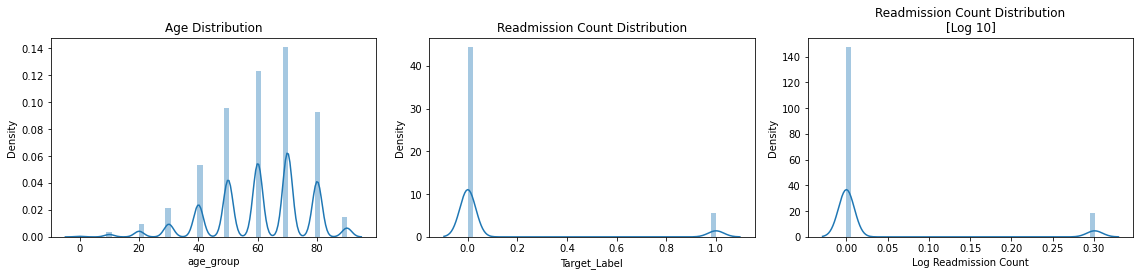

In [20]:
#Age and Readmission Count Frequency Distributions
f, ax = plt.subplots(1, 3, figsize=(16, 4), sharey=False)
sns.distplot(data.age_group, ax=ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_ylabel('Density')
sns.distplot(data['Target_Label'], ax=ax[1])
ax[1].set_title('Readmission Count Distribution')
sns.distplot(np.log10((data['Target_Label'][data['Target_Label'].notnull()] + 1)), ax=ax[2])
ax[2].set_title('Readmission Count Distribution\n[Log 10]')
ax[2].set_xlabel('Log Readmission Count')
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.savefig('output/age-and-Readmission-freqdist.png', format='png', dpi=600)
plt.show()


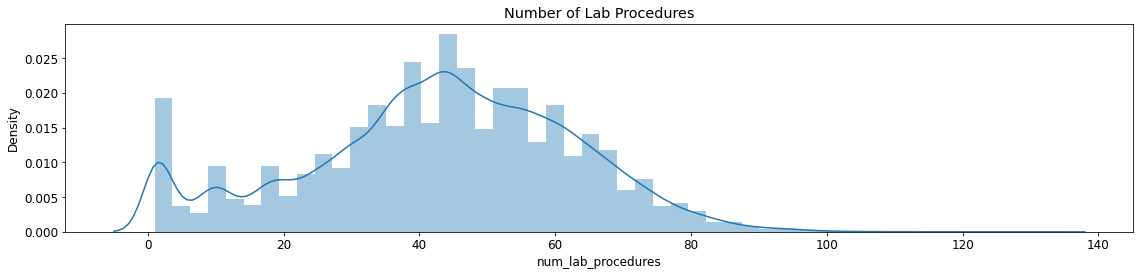

In [21]:
#Number of Lab Procedure and Readmission Count Frequency Distributions
f, ax = plt.subplots(1, 1, figsize=(16, 4), sharey=False)
sns.distplot(data.num_lab_procedures)
ax.set_title('Number of Lab Procedures')
ax.set_ylabel('Density')
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.savefig('output/num_lab_procedures-and-Readmission-freqdist.png', format='png', dpi=600)
plt.show()


In [22]:
# creating separate df from readmitted and not_readmitted
readmitted = data[data.Target_Label == 1]
not_readmitted = data[data.Target_Label == 0]
print("READMITTED:",len(readmitted))
print("NOT READMITTED:",len(not_readmitted))
print("TOTAL:",len(data))
print("%AGE READMITTED:",round(len(readmitted)*100/len(data),2))

READMITTED: 10855
NOT READMITTED: 84805
TOTAL: 95660
%AGE READMITTED: 11.35


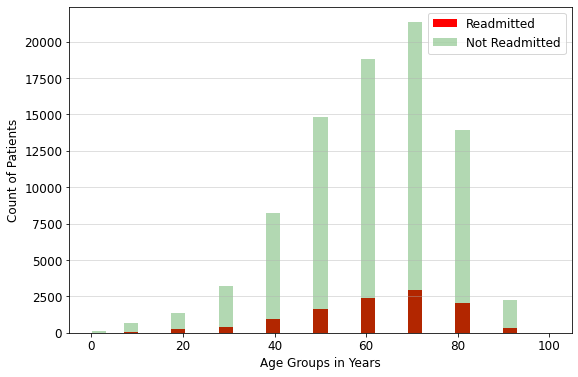

In [23]:
# Histogram plots for Age of Patient
plt.figure(figsize=(9,6))
binBoundaries = np.linspace(0,100,30)
plt.hist(x=readmitted.age_group, bins=binBoundaries, color='red', alpha=1.0, rwidth=0.9, label = "Readmitted")
plt.hist(x=not_readmitted.age_group, bins=binBoundaries, color='green', alpha=0.3, rwidth=0.9, label = "Not Readmitted")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Age Groups in Years')
plt.ylabel('Count of Patients')
plt.show()
# These dont seem to show any pattern

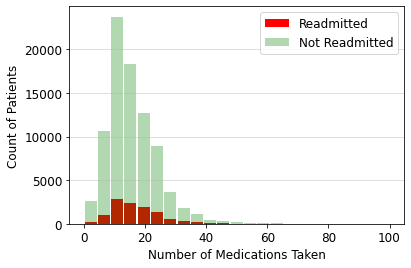

In [24]:
# Histogram plots for Number of Medications being taken
binBoundaries = np.linspace(0,100,24)
plt.hist(x=readmitted.num_medications, bins=binBoundaries, color='red', alpha=1.0, rwidth=0.9, label = "Readmitted")
plt.hist(x=not_readmitted.num_medications, bins=binBoundaries, color='green', alpha=0.3, rwidth=0.9, label = "Not Readmitted")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Number of Medications Taken')
plt.ylabel('Count of Patients')
plt.show()

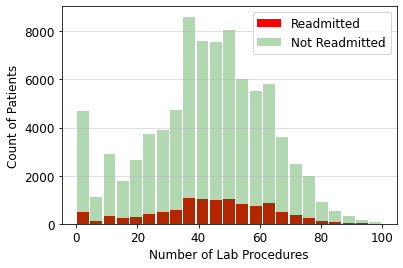

In [25]:
# Histogram plots for Number of Lab Procedures being taken
binBoundaries = np.linspace(0,100,24)
plt.hist(x=readmitted.num_lab_procedures, bins=binBoundaries, color='red', alpha=1.0, rwidth=0.9, label = "Readmitted")
plt.hist(x=not_readmitted.num_lab_procedures, bins=binBoundaries, color='green', alpha=0.3, rwidth=0.9, label = "Not Readmitted")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Count of Patients')
plt.show()

### Summary of Variables for Modeling
Below is the list of variables we are starting with. We will drop as needed based on analysis

In [26]:
print('Total number of predictors:', len(num_col_names + features))
print('Numerical predictors:',len(num_col_names))
print('Categorical converted to Numerical predictors:',len(features))
#print('Other Features:',len(features))

Total number of predictors: 35
Numerical predictors: 8
Categorical converted to Numerical predictors: 27


In [27]:
# Check Missing Data
data[num_col_names + features].isnull().sum().sort_values(ascending=False)

diabetesMed_vals                 0
age_group                        0
repaglinide_vals                 0
metformin_vals                   0
A1Cresult_vals                   0
max_glu_serum_vals               0
gender_vals                      0
has_weight                       0
number_diagnoses                 0
chlorpropamide_vals              0
number_inpatient                 0
number_emergency                 0
number_outpatient                0
num_medications                  0
num_procedures                   0
num_lab_procedures               0
nateglinide_vals                 0
glimepiride_vals                 0
change_vals                      0
tolazamide_vals                  0
metformin-pioglitazone_vals      0
metformin-rosiglitazone_vals     0
glimepiride-pioglitazone_vals    0
glipizide-metformin_vals         0
glyburide-metformin_vals         0
insulin_vals                     0
troglitazone_vals                0
acetohexamide_vals               0
acarbose_vals       

In [28]:
# Dataframe for modeling
model_data = data[num_col_names + features + ['Target_Label']]

In [29]:
model_data.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age_group,has_weight,...,tolazamide_vals,insulin_vals,glyburide-metformin_vals,glipizide-metformin_vals,glimepiride-pioglitazone_vals,metformin-rosiglitazone_vals,metformin-pioglitazone_vals,change_vals,diabetesMed_vals,Target_Label
0,1,41,0,1,0,0,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,0,0,0
1,3,59,0,18,0,0,0,9,10,0,...,-1,3,-1,-1,-1,-1,-1,1,1,0
2,2,11,5,13,2,0,1,6,20,0,...,-1,-1,-1,-1,-1,-1,-1,0,1,0
3,2,44,1,16,0,0,0,7,30,0,...,-1,3,-1,-1,-1,-1,-1,1,1,0
4,1,51,0,8,0,0,0,5,40,0,...,-1,2,-1,-1,-1,-1,-1,1,1,0


In [31]:
import yellowbrick

Before Exploring the attributes, will like to also check the correlation coefficients

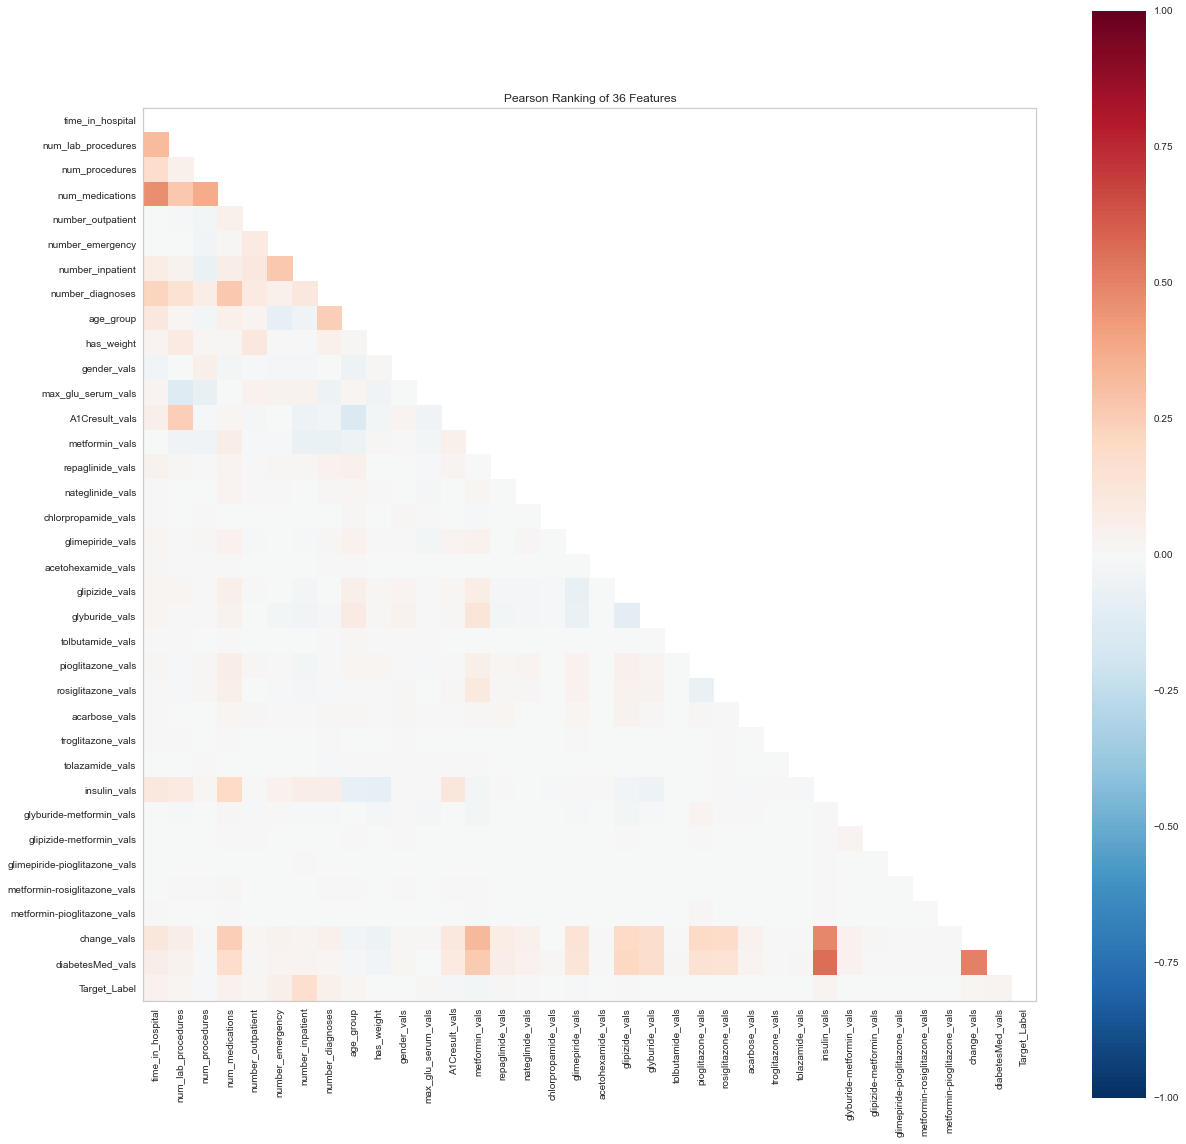

In [32]:
# To see if the data is correlated, make some Pearson Ranking charts
# The correlation between the variables is low (1 or -1 is high positive or high negative, 0 is low or no correlation)
# These results show there is correlation different different attributes
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# 'Target_Label' is the outcome we are looking for
# Specify the features of interest + Cannot use all attributes

num_features = num_col_names + features + ['Target_Label']

#num_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
#                'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 
#                'number_diagnoses', 'age_group', 'has_weight', 'Target_Label']
 # data_cat_cols 
# extract the numpy arrays from the data frame
X = model_data[num_features].values#.as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="output/pcoords1.png") # Draw/show/poof the data
#plt.show()

Cant say much about these varriables being highly correlated. So will feed all initially and reduce later if possible.

# Modeling Prep

### Split Data

In [33]:
import random
random.seed(10)

In [34]:
# Shuffle Data
model_data = model_data.sample(n=len(model_data),random_state=10)
model_data = model_data.reset_index(drop=True)

# 15% Validation / 15% Test split / 70% Train
vd_test = model_data.sample(frac=0.3, random_state=10)
test_data = vd_test.sample(frac=0.5, random_state=10)
vd_data = vd_test.drop(test_data.index)
train_data = model_data.drop(vd_test.index)

In [35]:
print('Readmission Rates by Set')
print('Test: ', test_data[test_data['Target_Label']==1].shape[0]/test_data.shape[0])
print('Validation: ', vd_data[vd_data['Target_Label']==1].shape[0]/vd_data.shape[0])
print('Train: ', train_data[train_data['Target_Label']==1].shape[0]/train_data.shape[0])

Readmission Rates by Set
Test:  0.1140149139312844
Validation:  0.11749947731549237
Train:  0.11249663988530809


### Balance Training Data

In [36]:
# Split training data into positive and negative
positive = train_data.Target_Label == 1
train_data_pos = train_data.loc[positive]
train_data_neg = train_data.loc[~positive]

# Merge and Balance
train_data_balanced = pd.concat([train_data_pos, train_data_neg.sample(n = len(train_data_pos), random_state=10)], axis = 0)

# Shuffle
train_data_balanced = train_data_balanced.sample(n = len(train_data_balanced), random_state = 10).reset_index(drop=True)

print('Readmission Rates by Set')
print('Test: ', test_data[test_data['Target_Label']==1].shape[0]/test_data.shape[0])
print('Validation: ', vd_data[vd_data['Target_Label']==1].shape[0]/vd_data.shape[0])
print('Train: ', train_data[train_data['Target_Label']==1].shape[0]/train_data.shape[0])
print('Train Balanced: ', train_data_balanced[train_data_balanced['Target_Label']==1].shape[0]/train_data_balanced.shape[0])

Readmission Rates by Set
Test:  0.1140149139312844
Validation:  0.11749947731549237
Train:  0.11249663988530809
Train Balanced:  0.5


### Create Input Matrices and Output Vectors

In [37]:
train_matrix = train_data[num_col_names + features].values
train_balanced_matrix = train_data_balanced[num_col_names +  features].values
vd_matrix = vd_data[num_col_names +  features].values

train_labels = train_data_balanced['Target_Label'].values
vd_labels = vd_data['Target_Label'].values

print('Training Matrix:',train_matrix.shape)
print('Balanced Training Matrix, Label:',train_balanced_matrix.shape, train_labels.shape[0])
print('Validation Matrix, Label:',vd_matrix.shape, vd_labels.shape[0])

Training Matrix: (66962, 35)
Balanced Training Matrix, Label: (15066, 35) 15066
Validation Matrix, Label: (14349, 35) 14349


### Scaling

In [38]:
scaler = StandardScaler()
scaler.fit(train_matrix)

scaled_train = scaler.transform(train_balanced_matrix)
scaled_vd = scaler.transform(vd_matrix)

# Modeling

In [39]:
def report(actual, predicted):
    plt.rcParams['figure.figsize'] = (8, 5)
    AUC = roc_auc_score(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    print('AUC: ', AUC)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Confusion Matrix:')
    conf_matrix = confusion_matrix(actual, predicted)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')
    return AUC, accuracy, precision, recall

### K Nearest Neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(scaled_train, train_labels)

KNeighborsClassifier(n_neighbors=100)

Train:
AUC:  0.557414044869242
Accuracy:  0.557414044869242
Precision:  0.5340042456167938
Recall:  0.9016328156113103
Confusion Matrix:


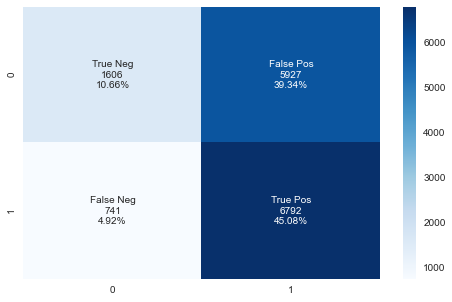

In [41]:
train_predictions = knn.predict_proba(scaled_train)[:,1]
train_predictions[train_predictions > 0.4] = 1
train_predictions[train_predictions <= 0.4] = 0
print('Train:')
knn_train_AUC, knn_train_accuracy, knn_train_precision, knn_train_recall = report(train_labels, train_predictions)

Validation:
AUC:  0.5406677003054546
Accuracy:  0.27639556763537526
Precision:  0.12785622593068036
Recall:  0.8861209964412812
Confusion Matrix:


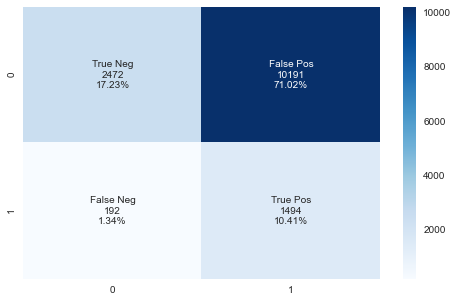

In [42]:
vd_predictions = knn.predict_proba(scaled_vd)[:,1]
vd_predictions[vd_predictions > 0.4] = 1
vd_predictions[vd_predictions <= 0.4] = 0
print('Validation:')
knn_vd_AUC, knn_vd_accuracy, knn_vd_precision, knn_vd_recall = report(vd_labels, vd_predictions)

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=10)
logistic_regression.fit(scaled_train, train_labels)

LogisticRegression(random_state=10)

Train:
AUC:  0.5931899641577061
Accuracy:  0.5931899641577061
Precision:  0.6096189881324172
Recall:  0.5182530200451347
Confusion Matrix:


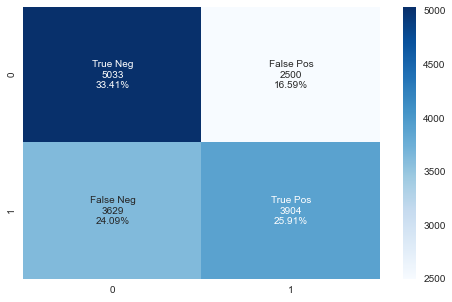

In [44]:
train_predictions = logistic_regression.predict_proba(scaled_train)[:,1]
train_predictions[train_predictions > 0.5] = 1
train_predictions[train_predictions <= 0.5] = 0
print('Train:')
lr_train_AUC, lr_train_accuracy, lr_train_precision, lr_train_recall = report(train_labels, train_predictions)

Validation:
AUC:  0.6028609002662225
Accuracy:  0.6579552582061468
Precision:  0.17857142857142858
Recall:  0.5308422301304864
Confusion Matrix:


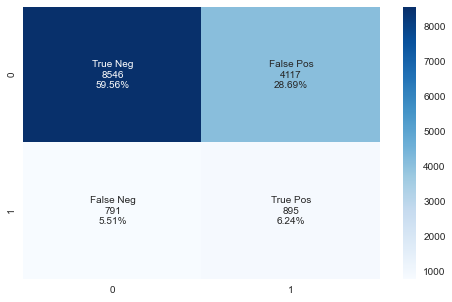

In [45]:
vd_predictions = logistic_regression.predict_proba(scaled_vd)[:,1]
vd_predictions[vd_predictions > 0.5] = 1
vd_predictions[vd_predictions <= 0.5] = 0
print('Validation:')
lr_vd_AUC, lr_vd_accuracy, lr_vd_precision, lr_vd_recall = report(vd_labels, vd_predictions)

### Stochastic Gradient Descent

In [46]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', alpha = 0.1, random_state=10)
sgd.fit(scaled_train, train_labels)

SGDClassifier(alpha=0.1, loss='log', random_state=10)

Train:
AUC:  0.590933227133944
Accuracy:  0.590933227133944
Precision:  0.60703125
Recall:  0.5157307845479888
Confusion Matrix:


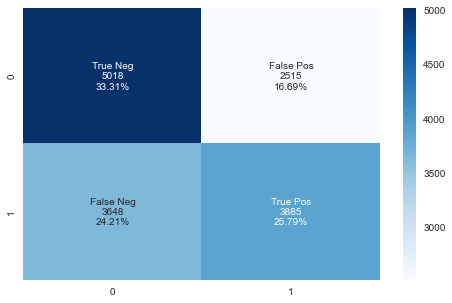

In [47]:
train_predictions = sgd.predict_proba(scaled_train)[:,1]
train_predictions[train_predictions > 0.5] = 1
train_predictions[train_predictions <= 0.5] = 0
print('Train:')
sgd_train_AUC, sgd_train_accuracy, sgd_train_precision, sgd_train_recall = report(train_labels, train_predictions)

Validation:
AUC:  0.6036943031551838
Accuracy:  0.6548888424280438
Precision:  0.17828999211977936
Recall:  0.536773428232503
Confusion Matrix:


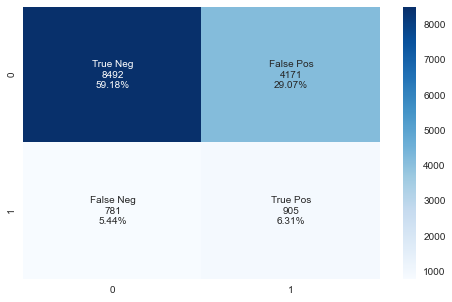

In [48]:
vd_predictions = sgd.predict_proba(scaled_vd)[:,1]
vd_predictions[vd_predictions > 0.5] = 1
vd_predictions[vd_predictions <= 0.5] = 0
print('Validation:')
sgd_vd_AUC, sgd_vd_accuracy, sgd_vd_precision, sgd_vd_recall = report(vd_labels, vd_predictions)

### Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(scaled_train, train_labels)

GaussianNB()

Train:
AUC:  0.501128368511881
Accuracy:  0.501128368511881
Precision:  0.5005689805207846
Recall:  0.9926987919819461
Confusion Matrix:


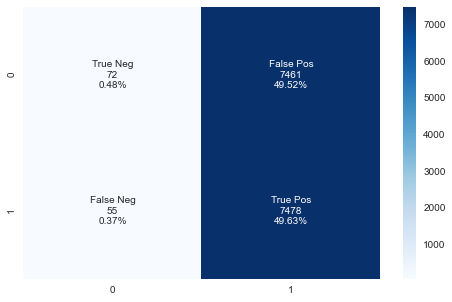

In [50]:
train_predictions = nb.predict_proba(scaled_train)[:,1]
train_predictions[train_predictions > 0.5] = 1
train_predictions[train_predictions <= 0.5] = 0
print('Train:')
nb_train_AUC, nb_train_accuracy, nb_train_precision, nb_train_recall = report(train_labels, train_predictions)

Validation:
AUC:  0.5015163829499624
Accuracy:  0.1242595302808558
Precision:  0.11781649571448644
Recall:  0.994661921708185
Confusion Matrix:


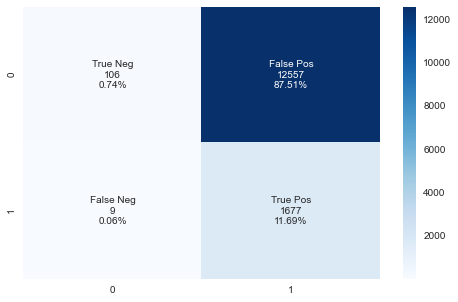

In [51]:
vd_predictions = nb.predict_proba(scaled_vd)[:,1]
vd_predictions[vd_predictions > 0.5] = 1
vd_predictions[vd_predictions <= 0.5] = 0
print('Validation:')
nb_vd_AUC, nb_vd_accuracy, nb_vd_precision, nb_vd_recall = report(vd_labels, vd_predictions)

### Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 10, random_state = 10)
dt.fit(scaled_train, train_labels)

DecisionTreeClassifier(max_depth=10, random_state=10)

Train:
AUC:  0.6571750962431966
Accuracy:  0.6571750962431966
Precision:  0.6664323868428451
Recall:  0.6293641311562459
Confusion Matrix:


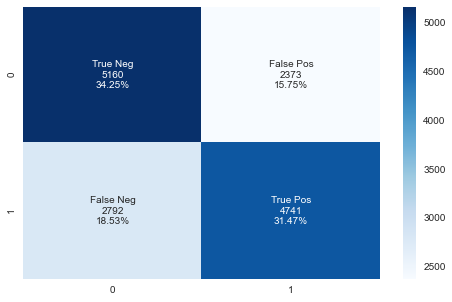

In [53]:
train_predictions = dt.predict_proba(scaled_train)[:,1]
train_predictions[train_predictions > 0.5] = 1
train_predictions[train_predictions <= 0.5] = 0
print('Train:')
dt_train_AUC, dt_train_accuracy, dt_train_precision, dt_train_recall = report(train_labels, train_predictions)

Validation:
AUC:  0.5784364766013462
Accuracy:  0.5966966339117709
Precision:  0.15659018589850945
Recall:  0.5545670225385528
Confusion Matrix:


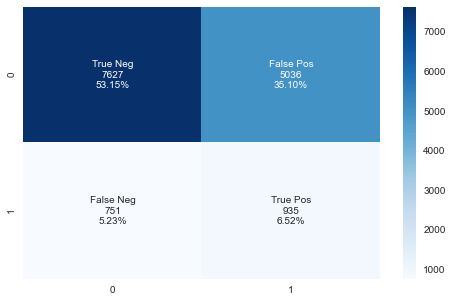

In [54]:
vd_predictions = dt.predict_proba(scaled_vd)[:,1]
vd_predictions[vd_predictions > 0.5] = 1
vd_predictions[vd_predictions <= 0.5] = 0
print('Validation:')
dt_vd_AUC, dt_vd_accuracy, dt_vd_precision, dt_vd_recall = report(vd_labels, vd_predictions)

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 10)
rf.fit(scaled_train, train_labels)

RandomForestClassifier(max_depth=6, random_state=10)

Train:
AUC:  0.6170184521439002
Accuracy:  0.6170184521439002
Precision:  0.6256593014967926
Recall:  0.5826363998407009
Confusion Matrix:


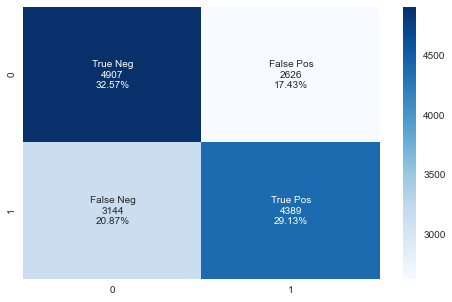

In [56]:
train_predictions = rf.predict_proba(scaled_train)[:,1]
train_predictions[train_predictions > 0.5] = 1
train_predictions[train_predictions <= 0.5] = 0
print('Train:')
rf_train_AUC, rf_train_accuracy, rf_train_precision, rf_train_recall = report(train_labels, train_predictions)

Validation:
AUC:  0.6031130569824998
Accuracy:  0.6207401212628058
Precision:  0.17121848739495799
Recall:  0.5800711743772242
Confusion Matrix:


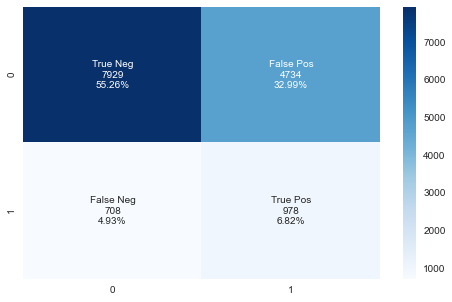

In [57]:
vd_predictions = rf.predict_proba(scaled_vd)[:,1]
vd_predictions[vd_predictions > 0.5] = 1
vd_predictions[vd_predictions <= 0.5] = 0
print('Validation:')
rf_vd_AUC, rf_vd_accuracy, rf_vd_precision, rf_vd_recall = report(vd_labels, vd_predictions)

### Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=75, learning_rate=1.0, max_depth=3, random_state=42)
gbc.fit(scaled_train, train_labels)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=75, random_state=42)

Train:
AUC:  0.6589672109385372
Accuracy:  0.658967210938537
Precision:  0.6637942825878813
Recall:  0.6442320456657374
Confusion Matrix:


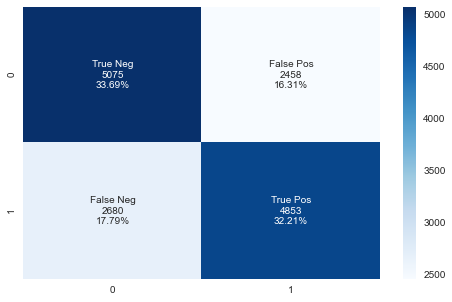

In [59]:
train_predictions = gbc.predict_proba(scaled_train)[:,1]
train_predictions[train_predictions > 0.5] = 1
train_predictions[train_predictions <= 0.5] = 0
print('Train:')
gbc_train_AUC, gbc_train_accuracy, gbc_train_precision, gbc_train_recall = report(train_labels, train_predictions)

Validation:
AUC:  0.5875962502350137
Accuracy:  0.5924454665830371
Precision:  0.160078405749755
Recall:  0.5812574139976275
Confusion Matrix:


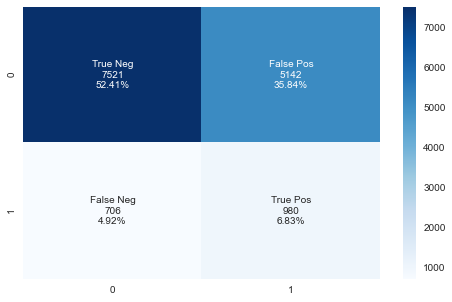

In [60]:
vd_predictions = gbc.predict_proba(scaled_vd)[:,1]
vd_predictions[vd_predictions > 0.5] = 1
vd_predictions[vd_predictions <= 0.5] = 0
print('Validation:')
gbc_vd_AUC, gbc_vd_accuracy, gbc_vd_precision, gbc_vd_recall = report(vd_labels, vd_predictions)

In [61]:
model_results_accuracy = {}
model_results_auc = {}
model_results_precision = {}
model_results_recall = {}

model_results_accuracy['KNN'] = knn_vd_accuracy
model_results_accuracy['LR'] = lr_vd_accuracy
model_results_accuracy['SGD'] = sgd_vd_accuracy
model_results_accuracy['NB'] = nb_vd_accuracy
model_results_accuracy['DT'] = dt_vd_accuracy
model_results_accuracy['RF'] = rf_vd_accuracy
model_results_accuracy['GBC'] = gbc_vd_accuracy

model_results_auc['KNN'] = knn_vd_AUC
model_results_auc['LR'] = lr_vd_AUC
model_results_auc['SGD'] = sgd_vd_AUC
model_results_auc['NB'] = nb_vd_AUC
model_results_auc['DT'] = dt_vd_AUC
model_results_auc['RF'] = rf_vd_AUC
model_results_auc['GBC'] = gbc_vd_AUC

model_results_recall['KNN'] = knn_vd_recall
model_results_recall['LR'] = lr_vd_recall
model_results_recall['SGD'] = sgd_vd_recall
model_results_recall['NB'] = nb_vd_recall
model_results_recall['DT'] = dt_vd_recall
model_results_recall['RF'] = rf_vd_recall
model_results_recall['GBC'] = gbc_vd_recall

model_results_precision['KNN'] = knn_vd_precision
model_results_precision['LR'] = lr_vd_precision
model_results_precision['SGD'] = sgd_vd_precision
model_results_precision['NB'] = nb_vd_precision
model_results_precision['DT'] = dt_vd_precision
model_results_precision['RF'] = rf_vd_precision
model_results_precision['GBC'] = gbc_vd_precision

In [63]:
len(values_accuracy)

NameError: name 'values_accuracy' is not defined

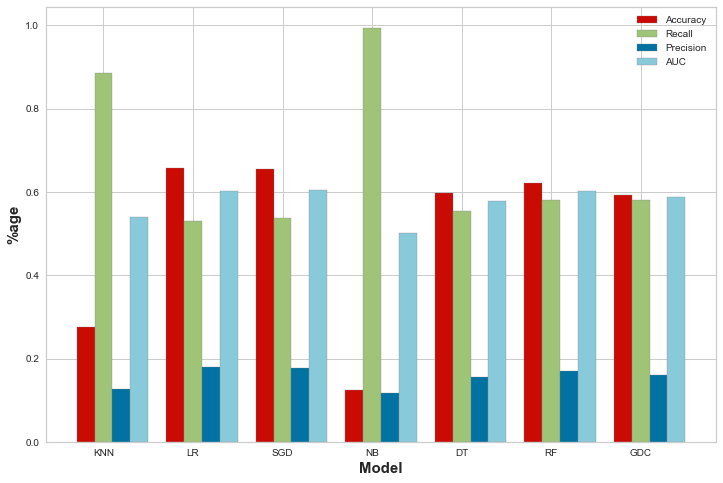

In [64]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(12, 8))
 
# set attbs for bar height
keys = model_results_accuracy.keys()
values_accuracy = model_results_accuracy.values()
values_recall = model_results_recall.values()
values_precision = model_results_precision.values()
values_auc = model_results_auc.values()

# Set position of bar on X axis
br1 = np.arange(len(values_accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, values_accuracy, color ='r', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, values_recall, color ='g', width = barWidth,
        edgecolor ='grey', label ='Recall')
plt.bar(br3, values_precision, color ='b', width = barWidth,
        edgecolor ='grey', label ='Precision')
plt.bar(br4, values_auc, color ='c', width = barWidth,
        edgecolor ='grey', label ='AUC')
 
# Adding Xticks
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('%age', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(values_accuracy))],
        ['KNN', 'LR', 'SGD', 'NB', 'DT' , 'RF' , 'GDC'])
 
plt.legend()
plt.show()

In [67]:
# Picking the Top 3 models for further analysis Logistic Regression, Stochastic Gradient Descent & Random Forest

Text(0.5, 1.0, 'ACCURACY')

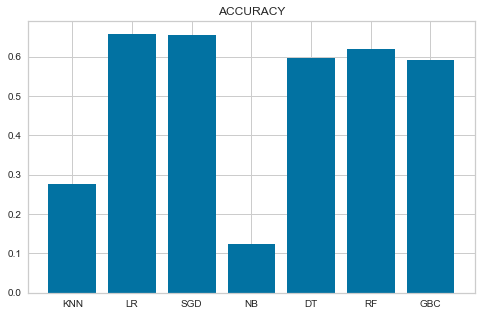

In [68]:
# bar plot for model accuracies
keys = model_results_accuracy.keys()
values = model_results_accuracy.values()
plt.bar(keys, values)
plt.title("ACCURACY")

In [69]:
# Look at parameters used by our current random forest
from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}


In [70]:
# Create parameter grid to sample
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [71]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
# rf.fit(X_train, y_train)
rf_random.fit(scaled_train, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.9min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=6,
                                                    random_state=10),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 10],
                                        'min_samples_split': [1, 2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [72]:
# View best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [73]:
# Use the parameter identified from random search to define ranges for grid search
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
                'bootstrap': [True, False],
                'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10, 20],
                'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [74]:
# Fit the grid search to the data
grid_search.fit(scaled_train, train_labels)
grid_search.best_params_

Fitting 3 folds for each of 5760 candidates, totalling 17280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 51.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 76.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 106.8min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 140.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 175.8min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 340.9min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 652.3min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 695.3min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 742.6min
[Parallel(n_jobs=-1)]: Done 9097 tasks  

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 400}

In [75]:
# Assigning Best Estimators 
# Then displaying CF matrix to check accuracy and see if it is better than the base model(96% accuracy)
best_grid = grid_search.best_estimator_

In [77]:
# Create parameter grid to sample
from sklearn.model_selection import ConfusionMatrix

ImportError: cannot import name 'ConfusionMatrix'

In [76]:
# Checking the accuracy of Model from Random Search
cm_best_grid = ConfusionMatrix(best_grid, classes=classes, percent=True)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm_best_grid.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm_best_grid.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm_best_grid.ax.texts:
    label.set_size(20)

#How did we do?
cm_best_grid.show()

NameError: name 'ConfusionMatrix' is not defined

In [ ]:
# Checking the accuracy of Model(Numbers) from Random Search
cm_best_grid = ConfusionMatrix(best_grid, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm_best_grid.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm_best_grid.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm_best_grid.ax.texts:
    label.set_size(20)

#How did we do?
cm_best_grid.show()

In [ ]:
# Precision, Recall, and F1 Score - Grid Search - outcome model
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(best_grid, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.show()

In [ ]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(best_grid)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.show()

## References
1. Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.
2. https://towardsdatascience.com/predicting-hospital-readmission-for-patients-with-diabetes-using-scikit-learn-a2e359b15f0
3. Hospital Readmissions Reduction Program (HRRP). (n.d.). Retrieved from
https://www.cms.gov/Medicare/Medicare-Fee-for-Service-Payment/AcuteInpatientPPS/Readmissions-Reduction-Program
Leonhardt, M. (2019, November 04). 
4. Rising health-care costs stall Americans' dreams of buying homes, building families and saving for retirement. Retrieved from 
https://www.cnbc.com/2019/11/04/health-care-costs-are-preventing-many-americans-from-hitting-life-milestones.html
5. Dataset: https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008
